In [1]:
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set()
from matplotlib import pyplot as plt

In [2]:
from sklearn.svm import SVC

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## SVM (Support Vector Machine)¶
SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

Goal of SVM
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane.

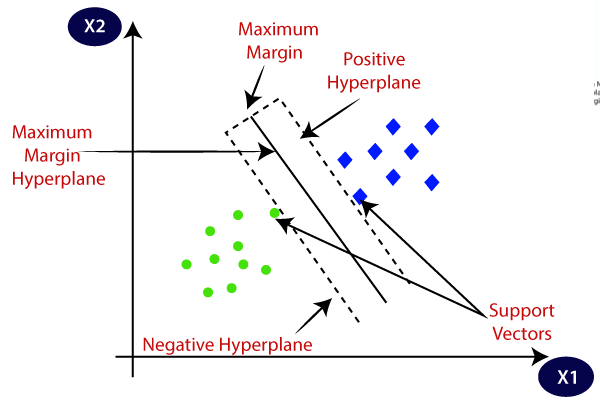

In [4]:
from IPython.display import Image
Image("https://www.kaggleusercontent.com/kf/96203833/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..RmldN7lhOelgS7VWA_sgng.D6iV0lmb3DY3OtKSGS7KN03VdZZM_6BNfMH4gIi2JoYCQ9FN4wwKZR1MqWVNtdCIQX3tPbJWnJe2wE0IRCkueCL9pIyIiTBfPGVhWsRKGSDgngi167MaFh56WWuHDQa2G38NKcUOoj-VOrSUEQK6zRnktKoDCNiu2odeXQ2D2NE2ULAKTBZ3sk76Q1zaA0tOBn-zCI4gzJAAlDg0FoqwVC60u3pIQoGWA9ESboBjRO29YZRvB24a7wHGMAEFZGW4aLDtiP4HsEJAtJduXLM2D4_NpucC4AVWkiHzltZtvFMhEOMniGdWaL-az_KKLolX6BgVc6HcdeiadZNtClvXWIuTnKHdjQ_IQaPj2T3cIpxOFic15zAEtcumHooJr0-TonfMGUzEXR_JVrbs1RNaD_jfHJTZR5reOeT_j_MISPXnz8BlaJWQVUlt8xlK1yPGPRFPhSnR21AHAm1fOIgtFYOH9KkTkmLcow3MT4bPuesN3hzhMwbsp-wdApfdTDXEQFTroqyVLrVdX2gTldhJ5urPthCjbEKZaAIh029aQPkdh2keC_PYYNmyHuvQtTC7py8SRRCfxcMA_vcFzIwz1tLEGK_wOHx-EKEU7F9PnrYA9N5SX6iXunrxdgC3PIwum4YfonE7Z-neC_RX5G_4ELsRkctofwsc9FRF0qUesXs.VZ2x45bPlLEccE8C-lda6A/__results___files/__results___3_0.png")

In [5]:
df = pd.read_csv("UniversalBank.csv")
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: >

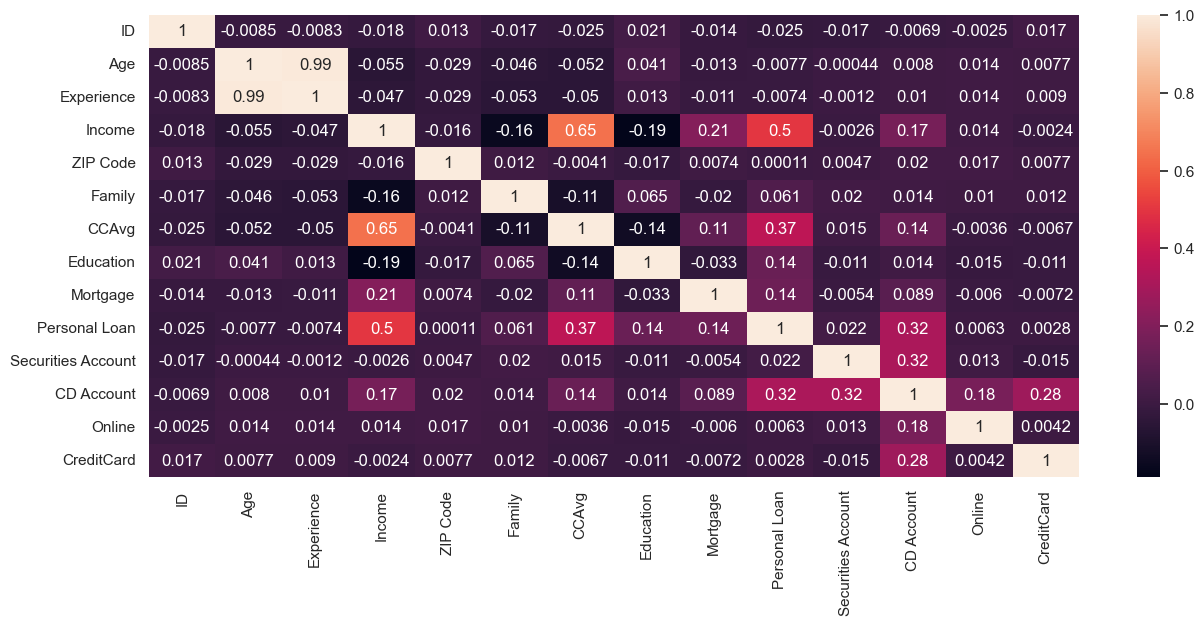

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot= True)

In [7]:
corr_df = df.corr()
feat_selectiiondf = (abs(corr_df["CreditCard"]) > 0.01)
feat_selectiiondf = pd.DataFrame(data= feat_selectiiondf)
selectd_Features = feat_selectiiondf[feat_selectiiondf.CreditCard == True].index

In [8]:
#After features Enginering
claned_df = df.loc[:, selectd_Features]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = claned_df.iloc[:,:-1]

In [11]:
Y = claned_df["CreditCard"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle= True)

In [13]:
svm = SVC(kernel= 'linear', random_state= 42)

In [ ]:
svm.fit(X_train, y_train)